<a href="https://colab.research.google.com/github/KavuuMakau/KavuuMakau/blob/main/Part_B_of_core_statistics_and_visualization_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hypothesis Testing 



In [ ]:
#importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#reading data
Car_df = pd.read_csv('https://bit.ly/DSCoreAutolibDataset')
Car_df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [ ]:
#Checking dataset shape
Car_df.shape

(16085, 13)

In [ ]:
#checking datatypes of columns and possibility of null values using df.info()
Car_df.info()
#There are no null values in this dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


# Data cleaning

This involves dealing with missing values, outliers and anomalies.

In [ ]:
#getting the number of missing values
Car_df.isnull().sum()
#no null values

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [ ]:
#checking for anomalies in data
#checking if the 'day_type' attribute has any entry values that are not "weekday" or "weekend"
Car_df['day_type'].unique()

array(['weekday', 'weekend'], dtype=object)

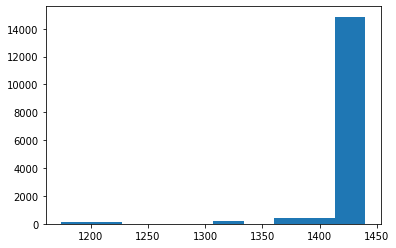

In [ ]:
#checking for outliers in the continuous numerical attributes
col_names = ['n_daily_data_points', 'dayOfWeek', 'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum', 'Utilib_returned_sum', 'Utilib_14_taken_sum','Utilib_14_returned_sum', 'Slots_freed_sum', 'Slots_taken_sum']

plt.hist(Car_df['n_daily_data_points'])
plt.show()

Car_df[Car_df['n_daily_data_points']<1350].count()
#there are 413 entries for 'n_daily_data_points' that are less than 1350

#dropping the datapoints that are less than 1350
Car_df = Car_df[Car_df['n_daily_data_points'] >= 1350]


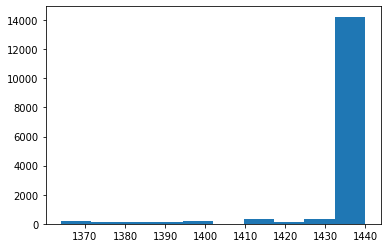

(15672, 13)

In [ ]:
#confirming that the points past 1350 are dropped from the dataframe
plt.hist(Car_df['n_daily_data_points'])
plt.show()
Car_df.shape

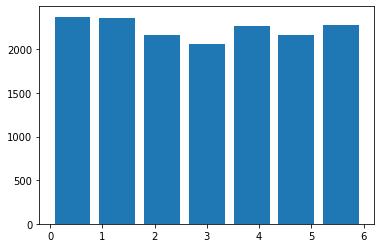

In [ ]:
plt.hist(Car_df['dayOfWeek'], bins = 7, rwidth = 0.8)
plt.show()

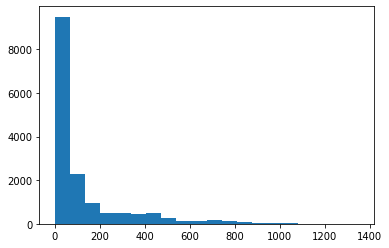

Postal code               2986
date                      2986
n_daily_data_points       2986
dayOfWeek                 2986
day_type                  2986
BlueCars_taken_sum        2986
BlueCars_returned_sum     2986
Utilib_taken_sum          2986
Utilib_returned_sum       2986
Utilib_14_taken_sum       2986
Utilib_14_returned_sum    2986
Slots_freed_sum           2986
Slots_taken_sum           2986
dtype: int64

In [ ]:
plt.hist(Car_df['BlueCars_taken_sum'], bins = 20)
plt.show()
Car_df[Car_df['BlueCars_taken_sum']>1000].count()
#there are 49 entries for 'BlueCars_taken_sum' that are greater than 1000

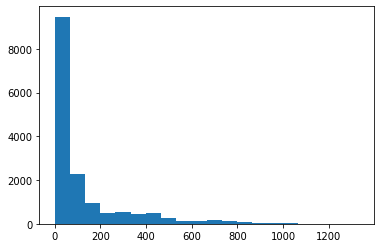

Postal code               48
date                      48
n_daily_data_points       48
dayOfWeek                 48
day_type                  48
BlueCars_taken_sum        48
BlueCars_returned_sum     48
Utilib_taken_sum          48
Utilib_returned_sum       48
Utilib_14_taken_sum       48
Utilib_14_returned_sum    48
Slots_freed_sum           48
Slots_taken_sum           48
dtype: int64

In [ ]:
plt.hist(Car_df['BlueCars_returned_sum'],bins = 20)
plt.show()
Car_df[Car_df['BlueCars_returned_sum']>1000].count()
#there are 50 entries for 'BlueCars_taken_sum' that are greater than 1000

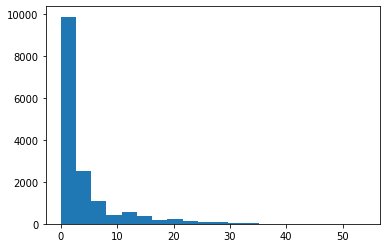

Postal code               28
date                      28
n_daily_data_points       28
dayOfWeek                 28
day_type                  28
BlueCars_taken_sum        28
BlueCars_returned_sum     28
Utilib_taken_sum          28
Utilib_returned_sum       28
Utilib_14_taken_sum       28
Utilib_14_returned_sum    28
Slots_freed_sum           28
Slots_taken_sum           28
dtype: int64

In [ ]:
plt.hist(Car_df['Utilib_taken_sum'], bins = 20)
plt.show()
Car_df[Car_df['Utilib_taken_sum']>35].count()
#there are 29 entries for 'Utilib_taken_sum' that are greater than 1000

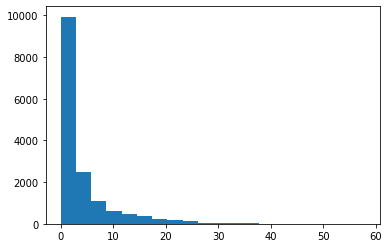

Postal code               12
date                      12
n_daily_data_points       12
dayOfWeek                 12
day_type                  12
BlueCars_taken_sum        12
BlueCars_returned_sum     12
Utilib_taken_sum          12
Utilib_returned_sum       12
Utilib_14_taken_sum       12
Utilib_14_returned_sum    12
Slots_freed_sum           12
Slots_taken_sum           12
dtype: int64

In [ ]:
plt.hist(Car_df['Utilib_returned_sum'], bins = 20)
plt.show()
Car_df[Car_df['Utilib_returned_sum'] > 40].count()

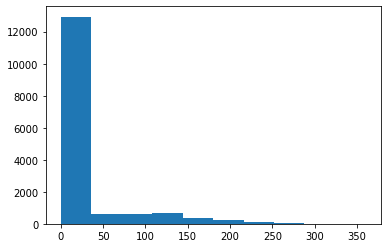

Postal code               17
date                      17
n_daily_data_points       17
dayOfWeek                 17
day_type                  17
BlueCars_taken_sum        17
BlueCars_returned_sum     17
Utilib_taken_sum          17
Utilib_returned_sum       17
Utilib_14_taken_sum       17
Utilib_14_returned_sum    17
Slots_freed_sum           17
Slots_taken_sum           17
dtype: int64

In [ ]:
plt.hist(Car_df['Slots_freed_sum'])
plt.show()
Car_df[Car_df['Slots_freed_sum'] > 300].count()

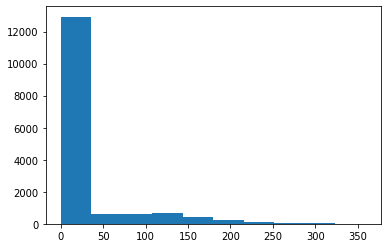

Postal code               4
date                      4
n_daily_data_points       4
dayOfWeek                 4
day_type                  4
BlueCars_taken_sum        4
BlueCars_returned_sum     4
Utilib_taken_sum          4
Utilib_returned_sum       4
Utilib_14_taken_sum       4
Utilib_14_returned_sum    4
Slots_freed_sum           4
Slots_taken_sum           4
dtype: int64

In [ ]:
plt.hist(Car_df['Slots_taken_sum'])
plt.show()
Car_df[Car_df['Slots_taken_sum'] > 330].count()

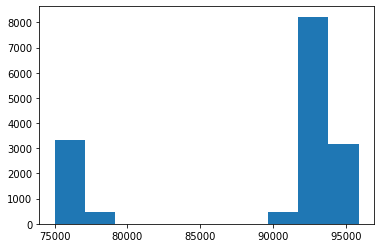

In [ ]:
#getting a general distribution of the postal codes
plt.hist(Car_df['Postal code'])
plt.show()

I chose not to drop any of the outliers except for the 'n_daily_data_points' column, which I dropped the entries that were conspicuously far away from the main part of the distribution; This was also the column with the most entries (413) that were distant from the main distribution so it was likely that the outliers could have an effect in this particular column. This data is extremely skewed and it seems that it is supposed to be that way, hence I highly doubt the outliers will affect any assumptions that are made concering this data and the results that you would get from analysis.

# Univariate and Bivariate summaries for the dataset

In [ ]:
#univariate summary
Car_df.describe(include = 'all')

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,15672.000000,15672,15672.000000,15672.000000,15672,15672.000000,15672.000000,15672.000000,15672.000000,15672.000000,15672.000000,15672.000000,15672.000000
unique,NaN,152,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,5/20/2018,NaN,NaN,weekday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,104,NaN,NaN,11234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,88791.183640,NaN,1436.015442,2.962289,NaN,126.231177,126.249936,3.704952,3.706483,8.616258,8.616705,22.700549,22.701123
std,7647.431275,NaN,12.733973,2.026446,NaN,185.739469,185.902003,5.818308,5.826846,12.875280,12.875132,52.249154,52.273170
min,75001.000000,NaN,1364.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,NaN,1439.000000,1.000000,NaN,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,NaN,1440.000000,3.000000,NaN,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,NaN,1440.000000,5.000000,NaN,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000


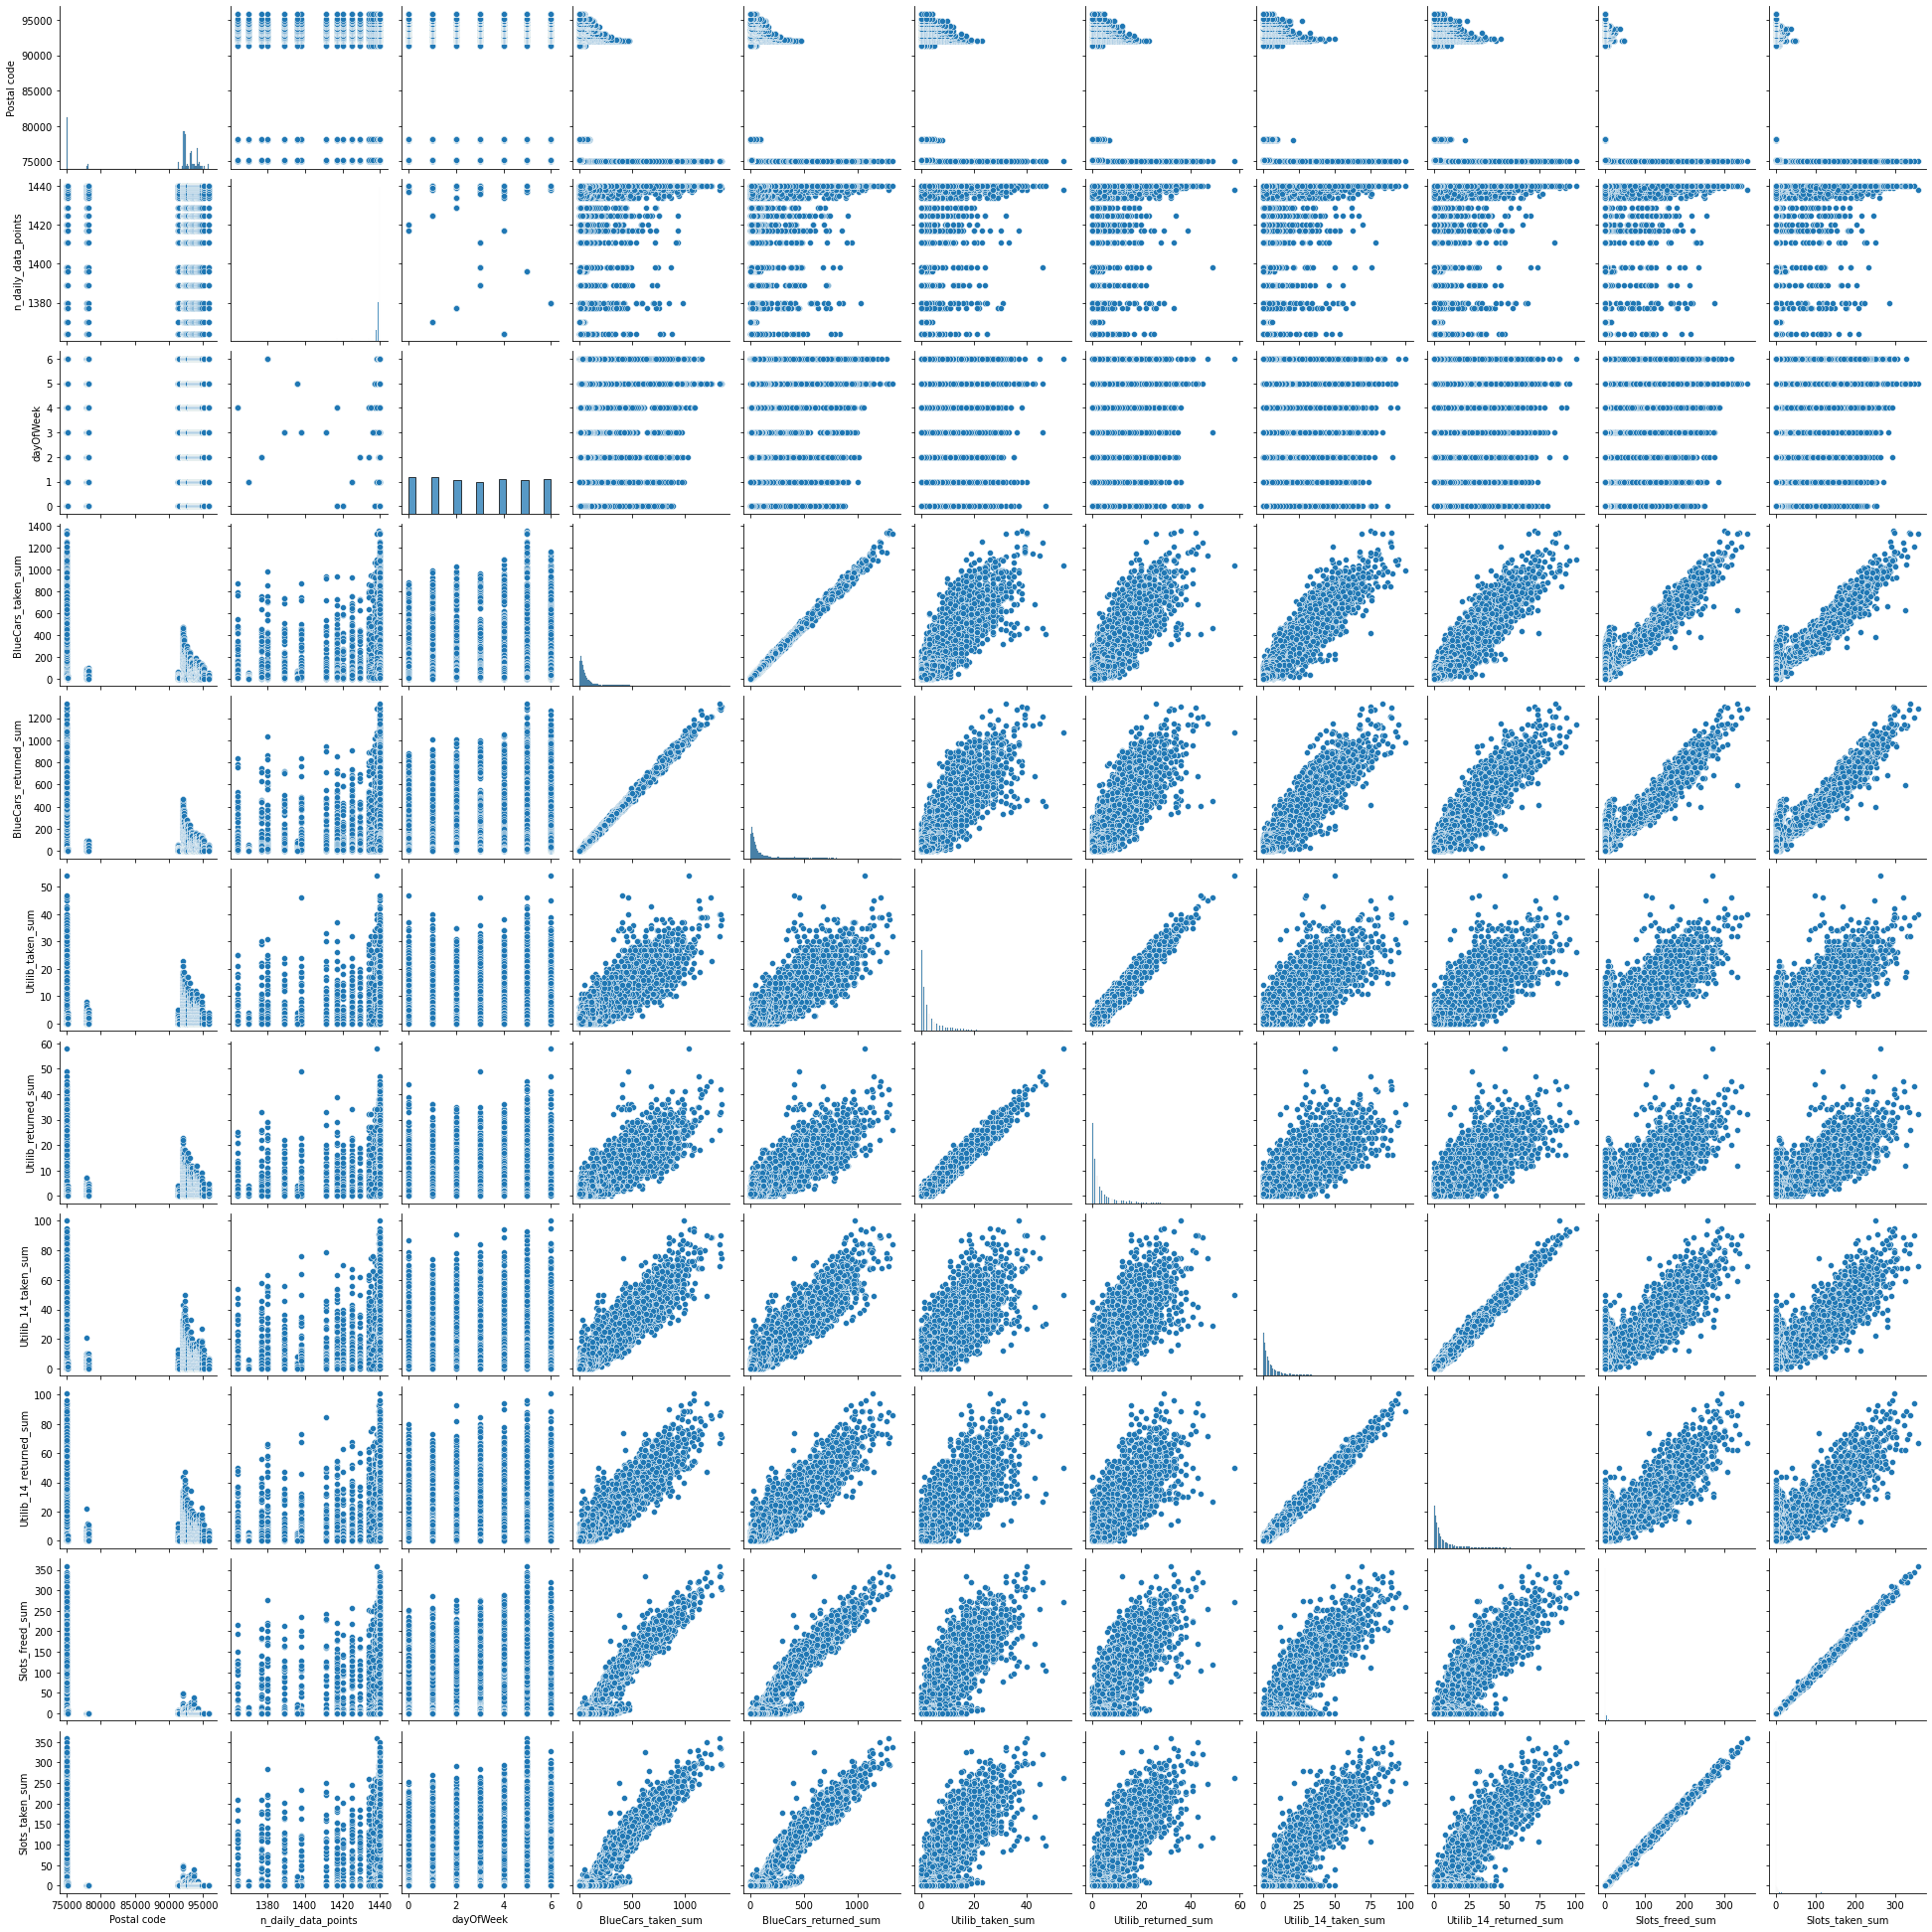

In [ ]:
#bivariate summary
sns.pairplot(data = Car_df)

*discuss relationships between different columns in the dataset.*

In [ ]:
#correlation matrix for all of the columns in the dataset

#install dython 
! pip install dython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#importing a library to identify nominal variables
#this step allows the associations function to distinguish the categorical variables from the numerical variables,
# hence it will use different functions to calculate the different correlation coefficients
from dython.nominal import identify_nominal_columns
categorical_features=identify_nominal_columns(Car_df)
categorical_features

['date', 'day_type']

In [ ]:
#importing necessary library to carry out correlation
from dython.nominal import associations

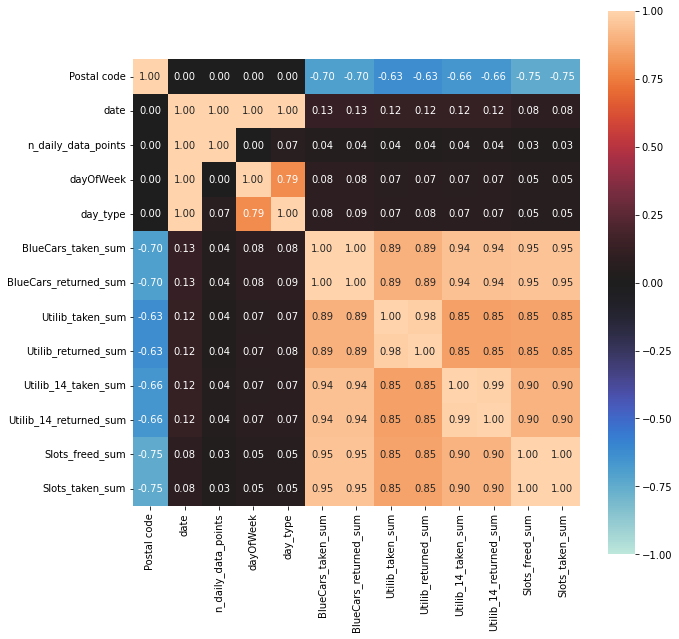

In [ ]:
#generating correlation matrix and heatmap
complete_correlation= associations(Car_df, filename= 'complete_correlation.png', figsize=(10,10))

In [ ]:
#most of the data is strongly correlated(i.e. the variables about the cars are strongly correlated with one another) 
#Especially the 'postal code' variable which seems to have a moderately high negative correlation to variables about the cars.
#Variables about the days have no correlation to the area variable (i.e. the 'postal code' variable)
#

# Implementing the hypothesis testing

f the sample size is not too small, then the t statistic will not be much affected even if the population distributions are skewed, although it will increase the chance that an correctly small P value will be reported (i.e., that the null hypothesis will be rejected when it is in fact true. Unless the sample size is small (less than 10), light-tailedness or heavy-tailedness will have little effect on the t statistic.

 **Defining the null and alternative hypothesis**

**H<sub>o</sub>:**  The number of blue cars taken in Area Y (Postal codes between 90,000 and 100,00) is equal to the number of blue cars taken in Area Z(areas with a postal code of between 70,000 and 80,000) during the weekend.

**H<sub>1</sub>:** The number of blue cars taken in Area Y(Postal codes between 90,000 and 100,000) is not equal to the number of blue cars taken in Area Z( Postal codes between 70,000 and 80,000) during the weekend.

In [ ]:
#To carry out this analysis I will need to have two subsets of data, weekend and weekday. 
#This is because we can only use data from one of the two time periods.
#I opted to use the weekend data.
Wknd_Car = Car_df[Car_df['day_type'] == "weekend"]

In [ ]:
#from the dataframe with weekend entries only
#check shape
Wknd_Car.shape
#data has 4438 entries.

(4438, 13)

In [ ]:
#Dividing data by Postal codes to get Area Y and Area Z.
Area_Y = Wknd_Car[Wknd_Car['Postal code'] < 85000]
Area_Z = Wknd_Car[Wknd_Car['Postal code'] > 85000]

In [ ]:
#Getting a random sample of 10 for each of the Areas
samp_Y = Area_Y['BlueCars_taken_sum'].sample(10, random_state = 0)
samp_Z = Area_Z['BlueCars_taken_sum'].sample(10, random_state = 0)

In [ ]:
#Getting a random sample of 1000 for each of the Areas
samp_Yb = Area_Y['BlueCars_taken_sum'].sample(1000, random_state = 0)
samp_Zb = Area_Z['BlueCars_taken_sum'].sample(1000, random_state = 0)

**Choosing a significance level**

The significance level for this test is 0.05. 

**∝** = *0.05*

**Calculating the test statistic**

I chose to use the Mann-Whitney U test because my data is not normally distributed, hence it fails one of the the assumptions for a parametric test.

I'm using it in place of two sample t-test.

In [ ]:
#importing libraries with Mann-Whitney U test.
from scipy.stats import mannwhitneyu


In [ ]:
#running the mann-Whitney test
result = mannwhitneyu(samp_Y, samp_Z, alternative = 'two-sided')
result
#The p-value is less than 0.05, hence we reject the null hypothesis and conclude that the results are statistically significant.

MannwhitneyuResult(statistic=96.0, pvalue=0.0005828399431792743)

In [ ]:
#running the mann-WHitney test
result = mannwhitneyu(samp_Yb, samp_Zb, alternative = 'two-sided')
result
#The p-value is less than 0.05, hence we reject the null hypothesis and conclude that the results are statistically significant.

MannwhitneyuResult(statistic=854875.0, pvalue=2.886352643217965e-166)

# Interpreting results

In the above test, p<0.05, hence we reject the null hypothesis and conclude that the number of Blue cars taken in the two areas, during the weekend, is different.

# Report on hypothesis testing procedure



**Problem statement**

We want to understand electric car usage. We are using data from Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset. The data can be found [here.](https://bit.ly/DSCoreAutolibDataset)

We desire to find out if the number of blue cars taken in two different geographical locations are different during the weekend. Hence the null and alternative hypothesis are as stated below.

H<sub>o</sub>: The number of blue cars taken in Area Y (Postal codes between 90,000 and 100,00) is equal to the number of blue cars taken in Area Z(areas with a postal code of between 70,000 and 80,000) during the weekend.

H<sub>i</sub>: The number of blue cars taken in Area Y(Postal codes between 90,000 and 100,000) is not equal to the number of blue cars taken in Area Z( Postal codes between 70,000 and 80,000) during the weekend.


This hypothesis is of particular interest because it seems as though there are more people from Area Y who seek service from Autolib when compared to Area Z. This is why we would like to find out, for the specific service of taking blue cars over the weekend, do the two regions utilize this service in equal measure.


**Data Description**

The two variables that we are interested in are: 'Postal code' (which contains the postal code of the are in Paris where the Autolib service is being sought) and 'BlueCars_taken_sum' (which desrcibes the aggregate sum of blue cars taken from Autolib on that date, in that area).

The data is from the Autolib database.The data is extremely skewed in almost all of its variable categories.

**Hypothesis testing procedure**

The first step is to pick a random sample from both areas (i.e. one sample from Area Y and another from Area Z). It is these two samples that I will test to see if they are similar or the difference between them is statistically significant.

*Why is this hypothesis test interesting?*

From the univariate analysis of the 'Postal code' column, there are more entries for service from people with zipcodes that are greater than 85,000. I am curious to find out whether, once the service and period are narrowed down is there a significant difference in the demand for said service between the two areas. In this particular test, the service of interest is the number of blue cars taken over the weekend period.

*What is the test statistic of choice and why?*

The data from the above dataset is extremely skewed and that is very likely to make it fail for normality. This alone disqualifies all parametric tests as they are dependent on normality of the independent variables for them to be robust. This is why I chose to use the Mann-Whitney U test which is essentially the non-parametric form of a two sample t-test. 

The significance level of this test is 5% i.e. **∝=0.05** .


**Hypothesis testing results**

I ran the test twice, once with a small sample size(n=10) and then a large sample size(n = 1000). Both times, p<0.05 hence we reject the null hypothesis. It is worth noting that the p-value decreases as the sample size increases. 
This is why I ran the test with a small sample to avoid the possibility of committing a Type I error(i.e. rejecting the null hypothesis when it is true). 

# Discussion of Test Sensitivity 

Non-parametric tests relax distribution assumptions and are therefore easier to justify, but they come at the cost of lower sensitivity owing to less information inherent in their assumptions. The assumptions for the Mann-Whitney U test are:
1. The observations from the two groups should be randomly selected from the target population.
2. Observations are independent of each other.
3. Observations should be continuous or ordinal.

For our dataset all of these assumptions have been met.

**Note:** The power of the Mann-Whitney U test increases with sample size.

**Summary and Conclusions**

The steps of carrying out this hypothesis test were:
1. Selecting random samples from the data.
2. Setting the significance level.
3. Calculating the test statitic and p-value.
4. Interpreting the p-value.
5. Drawing conclusions from the results and reporting about them.

In conclusion we reject the null hypothesis that the number of blue cars take in Area Y is equal to the number of blue cars taken in Area Z. From the test results the difference is statistically significant between Area Y and Area Z.


